In [2]:
import pandas as pd
import math
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import mixture

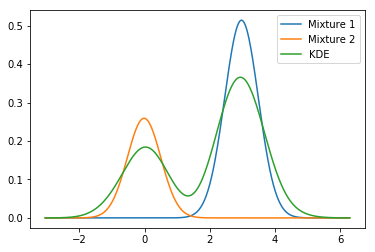

In [3]:
#fit mixture model
obs = np.concatenate((np.random.normal(loc=0.0, scale=0.5, size=100), np.random.normal(loc=3.0, scale=.5, size=200)))
g = mixture.GaussianMixture(n_components=2)
g.fit(obs.reshape(300,1))

#do kernel estimation
dens = sm.nonparametric.KDEUnivariate(obs)
dens.fit()

#draw mixture model
comp1 = g.weights_[0]*stats.norm.pdf(dens.support,g.means_[0,0],g.covariances_[0,0]**.5)
comp2 = g.weights_[1]*stats.norm.pdf(dens.support,g.means_[1,0],g.covariances_[1,0]**.5)

plt.plot(dens.support, comp1, label='Mixture 1')
plt.plot(dens.support, comp2, label='Mixture 2')
plt.plot(dens.support, dens.density, label='KDE')
plt.legend()
plt.show()

(4004,)


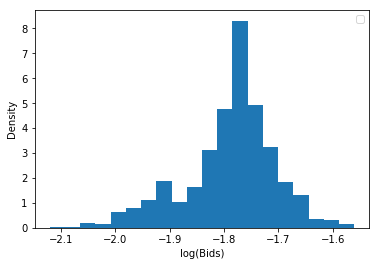

In [4]:
#load data
data = pd.read_csv('data/milk.csv')
bids = np.array(data['WW'].dropna())

#log transformation
lbids = np.log(bids[ (.12<=bids) & (bids<=.21) ])

print lbids.shape

#do kernel density estimation
dens = sm.nonparametric.KDEUnivariate(lbids)
dens.fit()

#plt.plot(dens.support, dens.density, label='KDE')
plt.hist(lbids,20,density=True)
plt.xlabel('log(Bids)')
plt.ylabel('Density')
plt.legend()
plt.savefig('results/bids_density.png')
plt.show()


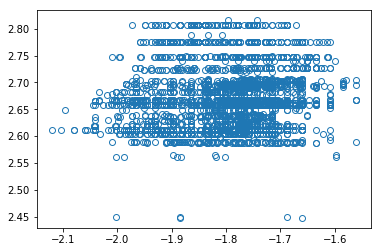

In [5]:
reg1 = data[['WW','FMO']].dropna()
reg1 = np.log(reg1[(.12<=reg1['WW']) & (reg1['WW']<=.21)])
plt.plot(reg1['WW'],reg1['FMO'],'o',mfc='none')

Means: [-1.90132556 -1.75706761]
Var: [0.0047487  0.00295696]
Weights: [0.21922422 0.78077578]


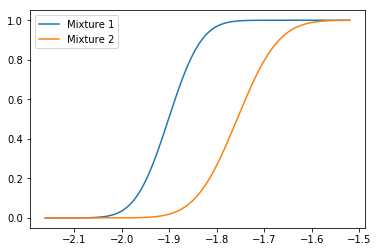

In [6]:
#fit mixture model
g = mixture.GaussianMixture(n_components=2)
g.fit(lbids.reshape(lbids.shape[0],1))

print 'Means: %s'%g.means_[:,0]
print 'Var: %s'%g.covariances_[:,0,0]
print 'Weights: %s'%g.weights_

#first see stocahstic dominance
comp1_cdf = stats.norm.cdf(dens.support,g.means_[0,0],g.covariances_[1,0]**.5)
comp2_cdf = stats.norm.cdf(dens.support,g.means_[1,0],g.covariances_[0,0]**.5)

plt.plot(dens.support, comp1_cdf, label='Mixture 1')
plt.plot(dens.support, comp2_cdf, label='Mixture 2')
plt.legend()
plt.show()

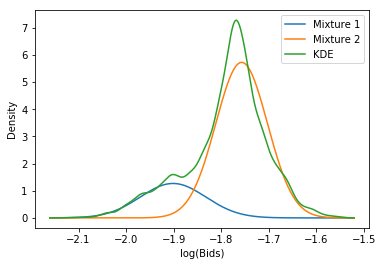

In [7]:
#graph kernel with mixture components
comp1 = g.weights_[0]*stats.norm.pdf(dens.support,g.means_[0,0],g.covariances_[0,0]**.5)
comp2 = g.weights_[1]*stats.norm.pdf(dens.support,g.means_[1,0],g.covariances_[1,0]**.5)

plt.plot(dens.support, comp1, label='Mixture 1')
plt.plot(dens.support, comp2, label='Mixture 2')
plt.xlabel('log(Bids)')
plt.ylabel('Density')
plt.plot(dens.support, dens.density, label='KDE')
plt.legend()
plt.savefig('results/bid_mixture.png')
plt.show()

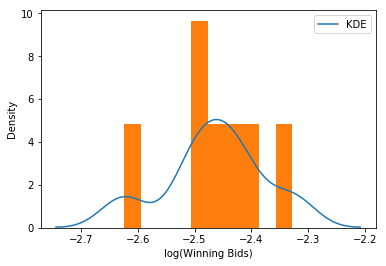

Means: [-2.3279029  -2.48763195]
Var: [1.00000000e-06 4.77669494e-03]
Weights: [0.14199834 0.85800166]


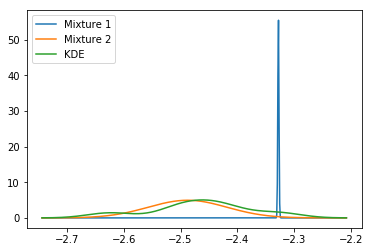

In [8]:
wbids = data['WW'][data['WIN']==1]
lwbids = np.array(np.log(wbids[ (wbids<=.1) & (wbids<=.21) ]))


dens = sm.nonparametric.KDEUnivariate(lwbids)
dens.fit()

plt.plot(dens.support, dens.density, label='KDE')
plt.hist(lwbids,10,density=True)
plt.xlabel('log(Winning Bids)')
plt.ylabel('Density')
plt.legend()
plt.show()



g = mixture.GaussianMixture(n_components=2)
g.fit(lwbids.reshape(lwbids.shape[0],1))

print 'Means: %s'%g.means_[:,0]
print 'Var: %s'%g.covariances_[:,0,0]
print 'Weights: %s'%g.weights_

#first see stocahstic dominance
comp1 = g.weights_[0]*stats.norm.pdf(dens.support,g.means_[0,0],g.covariances_[0,0]**.5)
comp2 = g.weights_[1]*stats.norm.pdf(dens.support,g.means_[1,0],g.covariances_[1,0]**.5)

plt.plot(dens.support, comp1, label='Mixture 1')
plt.plot(dens.support, comp2, label='Mixture 2')
plt.plot(dens.support, dens.density, label='KDE')
plt.legend()
plt.show()

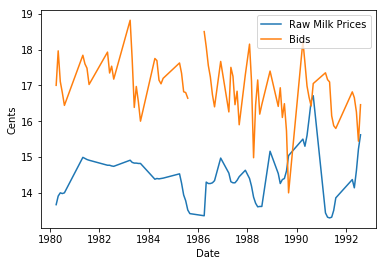

In [9]:
#summary statistics
rawdata = pd.read_csv('data/milk.csv')
data= rawdata.copy()

#general house keeping
data = data[ (data['YEAR']>=1980) & (data['MONTH'] !=0) ]
data = data.sort_values(['YEAR','MONTH','DAY'])


plot_points = data.groupby(['YEAR','MONTH'],as_index=False).mean()
labels = plot_points['MONTH'].astype(str) + '/'+ plot_points['YEAR'].astype(str)
labels = pd.to_datetime(labels,infer_datetime_format=True)

plt.plot(labels,plot_points['FMO'], label='Raw Milk Prices')
plt.plot(labels,plot_points['WW']*100, label='Bids')
plt.xlabel('Date')
plt.ylabel('Cents')
plt.legend()
plt.savefig('results/milk_vs_time.png')

plt.show()

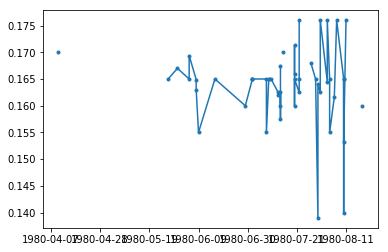

In [10]:
auct_key = ['YEAR','MONTH','DAY','SYSTEM','FMOZONE']
min_lag = data.groupby(auct_key, as_index=False).min()
cool_thing = min_lag[min_lag['YEAR']==1980]

labels = (cool_thing['MONTH'].astype(str) + '/'+
          cool_thing['DAY'].astype(str) + '/' + cool_thing['YEAR'].astype(str))
labels = pd.to_datetime(labels,infer_datetime_format=True)

plt.plot(labels, cool_thing['WW'],marker='.')